In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
d = {'author_id':[1, 2, 3, 4],'author': ['Jane Austen', 'Emily Bronte', 'Charlotte Bronte', 'Sylvia Plath'], 
     'birth_year': [1900, 1901, 1902, 1903]}
author = pd.DataFrame(data=d)

In [3]:
author

,author_id,author,birth_year
0,1,Jane Austen,1900
1,2,Emily Bronte,1901
2,3,Charlotte Bronte,1902
3,4,Sylvia Plath,1903


In [4]:
d = {'book_id':[1, 2, 3, 4, 5],'title': ['The Bell Jar', 'Wuthering Heights', 'Pride and Prejudice', 'Jane Eyre', 'Persuasion'], 
     'publishing_year': [1980, 1950, 1952, 1925, 1954], 'author_id':[4, 2, 1, 3, 1]}

book = pd.DataFrame(data=d)

In [5]:
book

,book_id,title,publishing_year,author_id
0,1,The Bell Jar,1980,4
1,2,Wuthering Heights,1950,2
2,3,Pride and Prejudice,1952,1
3,4,Jane Eyre,1925,3
4,5,Persuasion,1954,1


In [6]:
d = {'sales_id':[1, 2, 3, 4, 5],'sales_date': ['12/12/2019', '12/12/2019', '12/13/2019', '12/15/2019', '12/15/2019'], 
     'book_id': [1, 2, 1, 1, 4], 'sales_price':[9.99, 7.99, 9.99, 9.99, 8.99]}

sales = pd.DataFrame(data=d)

In [7]:
sales

,sales_id,sales_date,book_id,sales_price
0,1,12/12/2019,1,9.99
1,2,12/12/2019,2,7.99
2,3,12/13/2019,1,9.99
3,4,12/15/2019,1,9.99
4,5,12/15/2019,4,8.99


In [8]:
df = pd.merge(author, book, on='author_id')
df

,author_id,author,birth_year,book_id,title,publishing_year
0,1,Jane Austen,1900,3,Pride and Prejudice,1952
1,1,Jane Austen,1900,5,Persuasion,1954
2,2,Emily Bronte,1901,2,Wuthering Heights,1950
3,3,Charlotte Bronte,1902,4,Jane Eyre,1925
4,4,Sylvia Plath,1903,1,The Bell Jar,1980


In [9]:
df2 = pd.merge(df, sales, on='book_id')
df2

,author_id,author,birth_year,book_id,title,publishing_year,sales_id,sales_date,sales_price
0,2,Emily Bronte,1901,2,Wuthering Heights,1950,2,12/12/2019,7.99
1,3,Charlotte Bronte,1902,4,Jane Eyre,1925,5,12/15/2019,8.99
2,4,Sylvia Plath,1903,1,The Bell Jar,1980,1,12/12/2019,9.99
3,4,Sylvia Plath,1903,1,The Bell Jar,1980,3,12/13/2019,9.99
4,4,Sylvia Plath,1903,1,The Bell Jar,1980,4,12/15/2019,9.99


In [10]:
df3 = df2.drop(columns=['book_id', 'sales_id'])
df3

,author_id,author,birth_year,title,publishing_year,sales_date,sales_price
0,2,Emily Bronte,1901,Wuthering Heights,1950,12/12/2019,7.99
1,3,Charlotte Bronte,1902,Jane Eyre,1925,12/15/2019,8.99
2,4,Sylvia Plath,1903,The Bell Jar,1980,12/12/2019,9.99
3,4,Sylvia Plath,1903,The Bell Jar,1980,12/13/2019,9.99
4,4,Sylvia Plath,1903,The Bell Jar,1980,12/15/2019,9.99


In [11]:
df3['sales_date'] = pd.to_datetime(df3['sales_date'])
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   author_id        5 non-null      int64         
 1   author           5 non-null      object        
 2   birth_year       5 non-null      int64         
 3   title            5 non-null      object        
 4   publishing_year  5 non-null      int64         
 5   sales_date       5 non-null      datetime64[ns]
 6   sales_price      5 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 320.0+ bytes


## 1a. Find the highest and lowest selling books (that had at least one sale) by quantity during the month of Dec 2019.

In [12]:
df3['title'].value_counts()

The Bell Jar         3
Wuthering Heights    1
Jane Eyre            1
Name: title, dtype: int64

## 1b. Find the highest and lowest selling books (that had at least one sale) by revenue during the month of Dec 2019.

In [13]:
df3.groupby('title')['sales_price'].sum().reset_index().sort_values(['sales_price'], ascending=False)

,title,sales_price
1,The Bell Jar,29.97
0,Jane Eyre,8.99
2,Wuthering Heights,7.99


## If there are multiple possible books with the same quantity or revenue, sort by author ID and then by publishing year

In [14]:
df4 = df3['title'].value_counts().rename_axis('title').reset_index(name='counts')
df4

,title,counts
0,The Bell Jar,3
1,Wuthering Heights,1
2,Jane Eyre,1


In [15]:
df5 = pd.merge(df4, df3, on='title').drop_duplicates(subset=['title'], keep='last')

In [16]:
df5.sort_values(['author_id', 'publishing_year'], ascending=[True, True])

,title,counts,author_id,author,birth_year,publishing_year,sales_date,sales_price
3,Wuthering Heights,1,2,Emily Bronte,1901,1950,2019-12-12,7.99
4,Jane Eyre,1,3,Charlotte Bronte,1902,1925,2019-12-15,8.99
2,The Bell Jar,3,4,Sylvia Plath,1903,1980,2019-12-15,9.99


## 2. Find the top 3 highest selling authors by quantity from the year with the highest sales revenue, along with these authors’ total sales revenue and sales quantity for that year.

In [17]:
df5['year'] = pd.DatetimeIndex(df5['sales_date']).year

In [18]:
df5['revenue'] = df5['counts'] * df5['sales_price']
df5

,title,counts,author_id,author,birth_year,publishing_year,sales_date,sales_price,year,revenue
2,The Bell Jar,3,4,Sylvia Plath,1903,1980,2019-12-15,9.99,2019,29.97
3,Wuthering Heights,1,2,Emily Bronte,1901,1950,2019-12-12,7.99,2019,7.99
4,Jane Eyre,1,3,Charlotte Bronte,1902,1925,2019-12-15,8.99,2019,8.99


### Find year for highest sales revenue.

In [19]:
highest_sales_year = df5.groupby('year')['revenue'].sum().reset_index().sort_values(['revenue'], 
                                                                                        ascending=False)['year']

In [20]:
highest_sales_year

0    2019
Name: year, dtype: int64

## Author total sales revenue for the highest sales year

In [21]:
df5[df5['year'] == 2019].groupby(['author'])['revenue'].sum()[0:3]

author
Charlotte Bronte     8.99
Emily Bronte         7.99
Sylvia Plath        29.97
Name: revenue, dtype: float64

## Author total books sold for the highest sales year

In [22]:
df5[df5['year'] == 2019].groupby(['author'])['counts'].sum()[0:3]

author
Charlotte Bronte    1
Emily Bronte        1
Sylvia Plath        3
Name: counts, dtype: int64

## 3a. Find the oldest published book that the bookstore has. If more than one, share the full list.

In [23]:
oldest_published_year = min(book['publishing_year'])
def print_book_list(data_frame:pd.DataFrame):
    if len(df[df['publishing_year'] == min(book['publishing_year'])]) > 1:
        return df[df['publishing_year'] == min(book['publishing_year'])]
    else:
        return min(book['publishing_year'])

In [24]:
print_book_list(book)

1925

In [25]:
most_recent_date = df3['sales_date'].max()
most_recent_date

Timestamp('2019-12-15 00:00:00')

In [26]:
df3[df3['sales_date'] == most_recent_date][['title', 'sales_price', 'sales_date']]

,title,sales_price,sales_date
1,Jane Eyre,8.99,2019-12-15
4,The Bell Jar,9.99,2019-12-15


## 4. Find how old would the author be when each book was published

In [27]:
df['author_age_when_published'] = df['publishing_year'] - df['birth_year']
df[['author', 'author_age_when_published', 'title', 'publishing_year']].drop_duplicates(keep='last')

,author,author_age_when_published,title,publishing_year
0,Jane Austen,52,Pride and Prejudice,1952
1,Jane Austen,54,Persuasion,1954
2,Emily Bronte,49,Wuthering Heights,1950
3,Charlotte Bronte,23,Jane Eyre,1925
4,Sylvia Plath,77,The Bell Jar,1980


## 5. If we were to have 1 table on sales that would have all the data from all 3 tables combined, how would you go about and write it?



### Unnormalized Form?

In [28]:
df = df3.rename(columns={'author_id':'id'})
df

,id,author,birth_year,title,publishing_year,sales_date,sales_price
0,2,Emily Bronte,1901,Wuthering Heights,1950,2019-12-12,7.99
1,3,Charlotte Bronte,1902,Jane Eyre,1925,2019-12-15,8.99
2,4,Sylvia Plath,1903,The Bell Jar,1980,2019-12-12,9.99
3,4,Sylvia Plath,1903,The Bell Jar,1980,2019-12-13,9.99
4,4,Sylvia Plath,1903,The Bell Jar,1980,2019-12-15,9.99


In [29]:
to_append = [1, 'Jane Austen', 1900, 'Pride and Prejudice', 1952, None, None]
df_length = len(df)
df.loc[df_length] = to_append

In [30]:
df

,id,author,birth_year,title,publishing_year,sales_date,sales_price
0,2,Emily Bronte,1901,Wuthering Heights,1950,2019-12-12,7.99
1,3,Charlotte Bronte,1902,Jane Eyre,1925,2019-12-15,8.99
2,4,Sylvia Plath,1903,The Bell Jar,1980,2019-12-12,9.99
3,4,Sylvia Plath,1903,The Bell Jar,1980,2019-12-13,9.99
4,4,Sylvia Plath,1903,The Bell Jar,1980,2019-12-15,9.99
5,1,Jane Austen,1900,Pride and Prejudice,1952,NaT,NaN


In [31]:
to_append = [5, 'Jane Austen', 1900, 'Persuasion', 1954, None, None]
df_length = len(df)
df.loc[df_length] = to_append

In [32]:
df

,id,author,birth_year,title,publishing_year,sales_date,sales_price
0,2,Emily Bronte,1901,Wuthering Heights,1950,2019-12-12,7.99
1,3,Charlotte Bronte,1902,Jane Eyre,1925,2019-12-15,8.99
2,4,Sylvia Plath,1903,The Bell Jar,1980,2019-12-12,9.99
3,4,Sylvia Plath,1903,The Bell Jar,1980,2019-12-13,9.99
4,4,Sylvia Plath,1903,The Bell Jar,1980,2019-12-15,9.99
5,1,Jane Austen,1900,Pride and Prejudice,1952,NaT,NaN
6,5,Jane Austen,1900,Persuasion,1954,NaT,NaN


In [33]:
df.sort_values(by=['id'])

,id,author,birth_year,title,publishing_year,sales_date,sales_price
5,1,Jane Austen,1900,Pride and Prejudice,1952,NaT,NaN
0,2,Emily Bronte,1901,Wuthering Heights,1950,2019-12-12,7.99
1,3,Charlotte Bronte,1902,Jane Eyre,1925,2019-12-15,8.99
2,4,Sylvia Plath,1903,The Bell Jar,1980,2019-12-12,9.99
3,4,Sylvia Plath,1903,The Bell Jar,1980,2019-12-13,9.99
4,4,Sylvia Plath,1903,The Bell Jar,1980,2019-12-15,9.99
6,5,Jane Austen,1900,Persuasion,1954,NaT,NaN


## Would contain NaN values for books that made no sale.

# DSNBI_Analyst Test Questions (Section A)

In [34]:
df = pd.read_excel('DSNBI_Analyst Test Data - Section A.xlsx')

In [35]:
df.isnull().sum()

itemid                  0
shopid                  0
item_name               4
item_description      135
item_variation          0
price                   0
stock                   0
category                0
cb_option               0
is_preferred            0
sold_count              0
item_creation_time      0
dtype: int64

In [36]:
any(df.duplicated())

False

In [37]:
df.head()

,itemid,shopid,item_name,item_description,item_variation,price,stock,category,cb_option,is_preferred,sold_count,item_creation_time
0,1925574,210000,Golden mobile numbers,Unregistered prepaid cards1) 93355333 selling...,{},400.0,1,Mobile & Gadgets,0,0,0,2015-10-01 00:24:42
1,1925617,210000,Golden mobile numbers,Unregistered prepaid cards1) 93355888 selling...,{},400.0,1,Mobile & Gadgets,0,0,0,2015-10-01 00:26:37
2,943600,210000,Golden Mobile Numbers,Unregistered prepaid cards. Can port to post p...,{},8.0,1,Mobile & Gadgets,0,0,0,2015-08-25 21:02:13
3,1064405,210000,Golden Mobile Numbers,Unregistered prepaid cards. Can port to post p...,{},8.0,1,Mobile & Gadgets,0,0,0,2015-08-30 20:16:07
4,20046620,760000,101% AUTHENTIC BASEBALL CAPS,"PREORDER Takes about 23 weeks to arrive, will ...","{NEWERA BLACK: 35.0, NIKE SWOOSH DENIM: 35.0, ...",35.0,300,Women's Apparel,0,0,0,2016-05-09 01:14:34


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   itemid              50000 non-null  int64         
 1   shopid              50000 non-null  int64         
 2   item_name           49996 non-null  object        
 3   item_description    49865 non-null  object        
 4   item_variation      50000 non-null  object        
 5   price               50000 non-null  float64       
 6   stock               50000 non-null  int64         
 7   category            50000 non-null  object        
 8   cb_option           50000 non-null  int64         
 9   is_preferred        50000 non-null  int64         
 10  sold_count          50000 non-null  int64         
 11  item_creation_time  50000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 4.6+ MB


## 1. Write an excel formula to get the number of unique shops in this data set.
### Each shop must have a unique shopid.

In [39]:
unique_shops = df['shopid'].unique()
unique_shops[0:5]

array([  210000,   760000, 11272000, 49082000,   225000])

In [40]:
print("Number of unique shops is : ", len(unique_shops))

Number of unique shops is :  938


## 2. Write an excel formula to get the number of shops which is a cross border shop but NOT a preferred shop.

In [41]:
df['cb_option'].unique(), df['is_preferred'].unique()

(array([0, 1]), array([0, 1]))

In [42]:
cb_np = df[(df['cb_option'] == 1) & (df['is_preferred']==0)]
cb_np.head()

,itemid,shopid,item_name,item_description,item_variation,price,stock,category,cb_option,is_preferred,sold_count,item_creation_time
8,793229430,49082000,Women Lace Bra Bustier Crop Tops Soft Mesh Tri...,Material: Terylene Colors: BalckStyle: Sexy Br...,"{S: 9.98, M: 9.98, L: 9.98, XL: 9.98}",9.98,400,Women's Apparel,1,0,0,2017-12-28 19:55:45
9,809446063,49082000,Women Lace Bra Bustier Crop Tops Soft Mesh Tri...,Material: Terylene Colors: BalckStyle: Sexy Br...,"{S: 9.98, M: 9.98, L: 9.98}",9.98,300,Women's Apparel,1,0,0,2018-01-05 16:08:24
10,809446145,49082000,Women Lace Bra Bustier Crop Tops Soft Mesh Tri...,Colors: BalckStyle: Sexy BraSize Type: Regular...,"{S: 11.48, M: 11.48, L: 11.48, XL: 11.48}",11.48,400,Women's Apparel,1,0,0,2018-01-05 16:08:26
11,809427287,49082000,Women Backpack Synthetic Leather Backpacks Sof...,Material: Synthetic LeatherLining: Polyester3 ...,"{Black: 17.66, Grey: 17.66, Red: 17.66}",17.66,300,Bags & Luggage,1,0,0,2018-01-05 16:02:41
12,809427305,49082000,Women Backpack Synthetic Leather Backpacks Sof...,Material: Synthetic LeatherLining: Polyester3 ...,"{Pink: 17.99, Black: 17.99, Grey: 17.99}",17.99,300,Bags & Luggage,1,0,0,2018-01-05 16:02:41


In [43]:
print("The number of shops that are cross bordered but not preferred are :", len(cb_np))

The number of shops that are cross bordered but not preferred are : 42391


 ## 3. Write an excel formula to get the item_creation_time of item 874013437.

In [44]:
df[(df['itemid']==874013437)]['item_creation_time']

41   2018-01-28 13:40:27
Name: item_creation_time, dtype: datetime64[ns]

## 4. Create a new column called item_creation_date by extracting only the date from item_creation_time column.

In [45]:
from datetime import datetime
df["item_creation_date"] = [d.date() for d in df["item_creation_time"]]

In [46]:
df.head()

,itemid,shopid,item_name,item_description,item_variation,price,stock,category,cb_option,is_preferred,sold_count,item_creation_time,item_creation_date
0,1925574,210000,Golden mobile numbers,Unregistered prepaid cards1) 93355333 selling...,{},400.0,1,Mobile & Gadgets,0,0,0,2015-10-01 00:24:42,2015-10-01
1,1925617,210000,Golden mobile numbers,Unregistered prepaid cards1) 93355888 selling...,{},400.0,1,Mobile & Gadgets,0,0,0,2015-10-01 00:26:37,2015-10-01
2,943600,210000,Golden Mobile Numbers,Unregistered prepaid cards. Can port to post p...,{},8.0,1,Mobile & Gadgets,0,0,0,2015-08-25 21:02:13,2015-08-25
3,1064405,210000,Golden Mobile Numbers,Unregistered prepaid cards. Can port to post p...,{},8.0,1,Mobile & Gadgets,0,0,0,2015-08-30 20:16:07,2015-08-30
4,20046620,760000,101% AUTHENTIC BASEBALL CAPS,"PREORDER Takes about 23 weeks to arrive, will ...","{NEWERA BLACK: 35.0, NIKE SWOOSH DENIM: 35.0, ...",35.0,300,Women's Apparel,0,0,0,2016-05-09 01:14:34,2016-05-09


## Number of unique item sold

In [47]:
unique_item_sold = df[df['sold_count']>0]['item_name'].unique()
unique_item_sold

array(['101% AUTHENTIC BASEBALL CAPS',
       'Hada Labo Super Hydrating Perfect Gel Moisturizer 80g',
       'Nopierce Septum Ring', ...,
       'Tshirt short sleeve BATMAN character pattern cool popular mens T shirt jersey',
       'Guys TShirt O Neck Heat On The Street Nostalgic Men T shirt Funny Plus Size',
       'FUNNY PHYSICS S SCIENCE mens Tshirt cotton Fashion Brand t shirt men new DIY'],
      dtype=object)

In [48]:
print("Number of unique items sold:", len(unique_item_sold))

Number of unique items sold: 1848


## Total sold count

In [49]:
print("Total sold count is :", df['sold_count'].sum())

Total sold count is : 12075


## Total revenue

In [50]:
df['revenue'] = (df['price'] * df['sold_count'])
print("The total revenue is :", df['revenue'].sum())

The total revenue is : 116937.87999999998


In [51]:
df.item_creation_date.value_counts()

2018-03-24    1699
2018-03-07    1122
2016-12-27     965
2016-09-21     809
2017-10-28     783
              ... 
2016-02-05       1
2016-01-23       1
2015-12-07       1
2016-03-05       1
2016-03-28       1
Name: item_creation_date, Length: 972, dtype: int64

## Distinct count of item creation date

In [52]:
print("The distinct count of item creation date is :", len(df.item_creation_date.value_counts()))

The distinct count of item creation date is : 972


## Group by categories

In [53]:
df.groupby('category')['stock'].sum()

category
Bags & Luggage              3575792
Computers & Peripherals      633513
Design & Crafts             1379105
Food & Beverages                316
Games & Hobbies              295134
Health & Beauty             3958343
Home & Living              10167597
Home Appliances              155612
Jewellery & Accessories     3981988
Men's Shoes                 6326935
Men's Wear                 17661986
Miscellaneous               4507380
Mobile & Gadgets           14453962
Pet Accessories             1063400
Sports & Outdoors           1956421
Tickets & Vouchers                0
Toys, Kids & Babies         7111559
Watches                      893124
Women's Apparel            27649124
Women's Shoes              35436299
Name: stock, dtype: int64

## 5. What else can you tell us about this dataset? It can be any exploratory analysis that you think is interesting. Please support your findings with any table / chart.

<AxesSubplot:xlabel='category'>

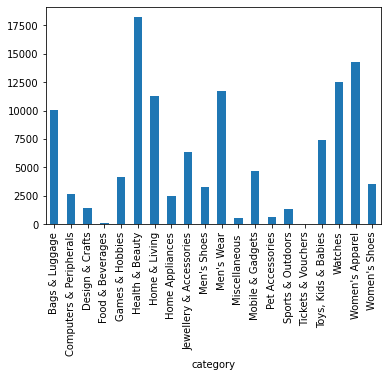

In [54]:
df.groupby('category')['revenue'].sum().plot(kind='bar')

## What is the most expensive item?

In [55]:
df[df['price'] == df.price.max()][['item_name', 'price']]

,item_name,price
47517,Balo đựng Macbook 15inch Tucano Blue,1390000.0
47518,Balo đựng Macbook 15inch Tucano Blue,1390000.0


## What is the cheapest item and which store sells it?

In [56]:
df[df['price'] == df.price.min()][['shopid', 'item_name', 'price']]

,shopid,item_name,price
5487,739014,Organza Drawstring Pouches/Organza Bag,0.13
5488,739014,Organza Drawstring Pouches/Organza Bag,0.13
5489,739014,Organza Drawstring Pouches/Organza Bag,0.13
5490,739014,Organza Drawstring Pouches/Organza Bag,0.13
5491,739014,Organza Drawstring Pouches/Organza Bag,0.13
5493,739014,Organza Drawstring Pouches/Organza Bag,0.13
5494,739014,Organza Drawstring Pouches/Organza Bag,0.13
5495,739014,Organza Drawstring Pouches/Organza Bag,0.13
38115,60488110,【BLNGaming】Silicone Joystick Thumb Caps for PS...,0.13
38301,60488110,【BLNGaming】Silicone Joystick Thumb Caps for PS...,0.13


## For each category, which shops deal in that product

In [57]:
def get_shop(df:pd.DataFrame, category:str) -> pd.DataFrame:
    return df[df['category'] == category][['shopid', 'item_name', 'price']]

get_shop(df, 'Computers & Peripherals')

,shopid,item_name,price
615,5434003,Wired optical mouse,8.00
616,5434003,Wired optical mouse,8.00
617,5434003,Micro SD Memory USB Card Reader,4.00
618,5434003,Micro SD Memory USB Card Reader,4.00
619,5434003,Micro SD Memory USB Card Reader,4.00
...,...,...,...
43104,27584121,Embroidered shirt 💋Print fashion shirt long sl...,7.32
43793,10203122,Power Supply Buck Converter Step Down Module,3.17
43794,10203122,Power Supply Buck Converter Step Down Module,3.88
47517,8505123,Balo đựng Macbook 15inch Tucano Blue,1390000.00


In [58]:
df[df['category'] == 'Health & Beauty'].head()

,itemid,shopid,item_name,item_description,item_variation,price,stock,category,cb_option,is_preferred,sold_count,item_creation_time,item_creation_date,revenue
6,78419076,11272000,Hada Labo Super Hydrating Perfect Gel Moisturi...,Hada Labo Super Hydrating Perfect Gel Moisturi...,"{Hydratg UV: 28.72, Super Hydg: 28.72, Whiteni...",28.72,8,Health & Beauty,0,1,5,2016-10-20 11:17:41,2016-10-20,143.60
7,252736983,11272000,Hada Labo Super Hydrating Perfect Gel Moisturi...,Hada Labo is a skin care line researched & dev...,{},28.72,8,Health & Beauty,0,1,1,2017-05-09 18:33:30,2017-05-09,28.72
626,501083679,3021003,"Painless Bikini Waxing, Hard Wax Beans",Type:Hair Removal WaxFlavour:Strawberry /Honey...,"{Rose: 9.99, Tea tree: 9.99, Chocolate: 9.99, ...",9.99,60,Health & Beauty,0,0,0,2017-09-19 10:27:33,2017-09-19,0.00
627,501683130,3021003,"Painless Bikini Waxing, Hard Wax Beans",Type:Hair Removal WaxFlavour:Strawberry /Honey...,"{Coffee: 7.99, Apple: 7.99, Rose: 7.99, Lavend...",7.99,80,Health & Beauty,0,0,0,2017-09-19 13:12:01,2017-09-19,0.00
866,3699589,1103003,MONTHS TOOTHBRUSH SET /IZOLA,DETAILSMade of sustainable bamboo and nylon br...,{},21.00,1,Health & Beauty,0,0,0,2015-11-18 17:30:17,2015-11-18,0.00


In [59]:
# list the crossborder items

In [60]:
top_10_items = df.groupby('item_name')['revenue'].sum().reset_index().sort_values(['revenue'], 
                                                                                  ascending=False)[0:10]

## Top 10 items that sold the most by revenue

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 128156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
<ipython-input-61-376b7476dbb2>:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 128156 missing from current font.
  font.set_text(s, 0, flags=flags)


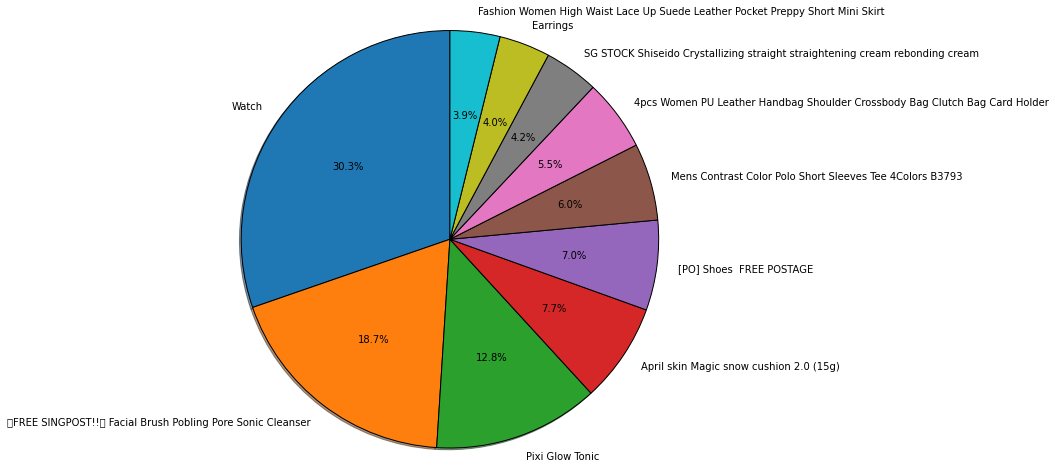

In [61]:
slices = top_10_items['revenue']
labels = top_10_items['item_name']

plt.pie(slices, labels=labels, shadow=True,
        startangle=90, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'}, radius = 2.4)

plt.tight_layout()
plt.show()

## Most sold items by quantity

In [62]:
quantity = df.groupby('item_name')['sold_count'].sum().reset_index().sort_values(['sold_count'], ascending=False)[0:10]

<ipython-input-63-27226ad6f953>:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


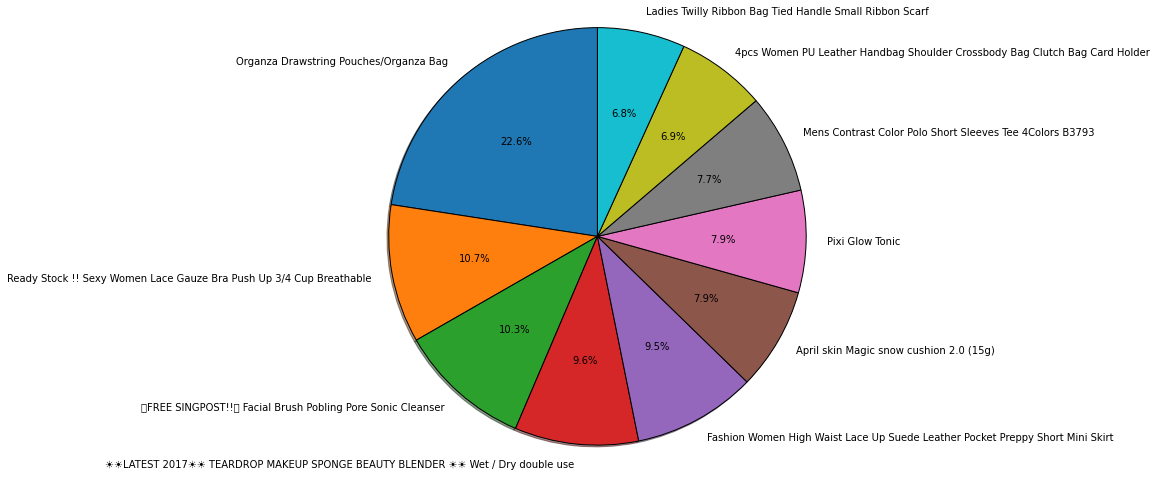

In [63]:
slices = quantity['sold_count']
labels = quantity['item_name']

plt.pie(slices, labels=labels, shadow=True,
        startangle=90, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'}, radius = 2.4)

plt.tight_layout()
plt.show()

## Did cross border-items generate more revenue?

In [64]:
cb = df.groupby('cb_option')['revenue'].sum().reset_index().sort_values(['revenue'], ascending=False)[0:10]

Text(0, 0.5, 'Revenue')

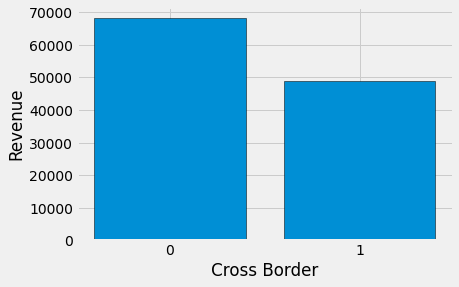

In [65]:
plt.style.use('fivethirtyeight')
count = cb['revenue']
cb_   = cb['cb_option'].astype(str)
plt.bar(cb_, count, edgecolor='black')
plt.xlabel("Cross Border")
plt.ylabel("Revenue")

## Standard Deviation between prices of same item

In [66]:
# only top 10 selected
df.groupby('item_name')['price'].std().reset_index().sort_values(['price'], ascending=False)[0:10]

,item_name,price
5937,LOCAL PERSONAL AND BUSINESS LOAN AVAILABLE,622253.967444
5670,Kids Children Girls Short Sleeve Tshirt Dress ...,57729.992425
3044,DIY Desktop For Gamers,1060.660172
10571,Watch,787.885162
1294,ASUS Zen Aio GOLD 23.8in AllInOne PC,712.652089
3045,DIY Desktop For Gamers,707.106781
4905,HP Folio 1040 G3 Laptop,636.396103
4904,HP EliteBook 840 G3 Laptop,636.396103
2560,Cellglo Crystal Eyes,538.108260
4903,HP EliteBook 820 Laptop,458.257569


## Compare Prices

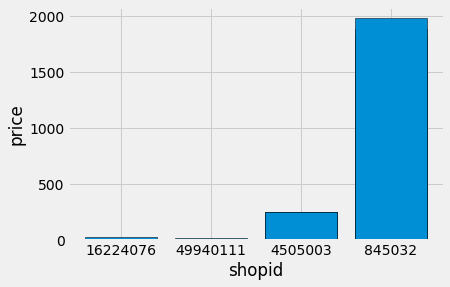

In [67]:
def compare_price(df:pd.DataFrame, item_name:str):
    price = df[df['item_name'] == 'Watch'][['item_name', 'price', 'shopid']].sort_values(by=['price'])
    
    plt.style.use('fivethirtyeight')
    count = price['price']
    cb_   = price['shopid'].astype(str)
    plt.bar(cb_, count, edgecolor='black')
    plt.xlabel("shopid")
    plt.ylabel("price")
    
compare_price(df, 'Watch')

# For each category, which shop sold the most product?

In [68]:
df.groupby(['category', 'shopid'])['revenue'].sum().reset_index().sort_values(['revenue'], ascending=False).drop_duplicates(subset=['category'], keep='first')

,category,shopid,revenue
1492,Watches,845032,9924.00
553,Home & Living,4570022,5202.00
445,Health & Beauty,11298092,4200.00
982,Men's Wear,15004011,3947.43
1631,Women's Apparel,8463086,2756.13
295,Games & Hobbies,94090,2254.00
21,Bags & Luggage,376068,1932.90
883,Men's Shoes,167052,1738.00
734,Jewellery & Accessories,137019,1490.00
197,Computers & Peripherals,30875067,1256.67
